# 1. Prevendo Falência de Empresas

Esse projeto usa os algoritmos de classificação apresentados no livro **An Introduction to Statistical Learning** para prever falência de companhias usando a base Company Bankruptcy Prediction do Kaggle. Os seguintes algoritmos foram utilizados: 

1. Regressão Logística
2. KNN
3. Naive Bayes
4. Árvores de Decisão
5. Bagging
6. Random Forest
7. Boosting
8. Support Vector Machines
9. Linear Discriminant Analysis
10. Quadratic Discriminant Analysis

A base de dados utilizada possui 96 variáveis que podem ser utilizadas como preditores, sendo que várias possuem pouca variação, ou seja, há um problema de multicolinearidade. Portanto, com tantas variáveis, alguns algoritmos apresentam uma performance ruim quando avaliadas a acurácia e a AUC da curva ROC pela comparação com o conjunto de teste, como o Naive Bayes e o QDA. Sendo assim, antes de que os algoritmos fossem treinados e comparados com um conjunto de teste, os dados foram ajustados para que os seis primeiros componentes principais fossem usados como preditores para o treinamento dos algoritmos. Esse ajuste melhora consideravelmente a performance de todos os algoritmos. 

Links: 

[An Introduction to Statistical Learning](https://hastie.su.domains/ISLP/ISLP_website.pdf.download.html)

[Dados](https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction)

# 2. Importando os pacotes e baixando os dados

In [1]:
# importando alguns pacotes que serão utilizados em todas as etapas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score

In [2]:
# baixando os dados

import kagglehub

# Download latest version
path = kagglehub.dataset_download("fedesoriano/company-bankruptcy-prediction")

In [3]:
df = pd.read_csv(path + '\\data.csv')


In [4]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


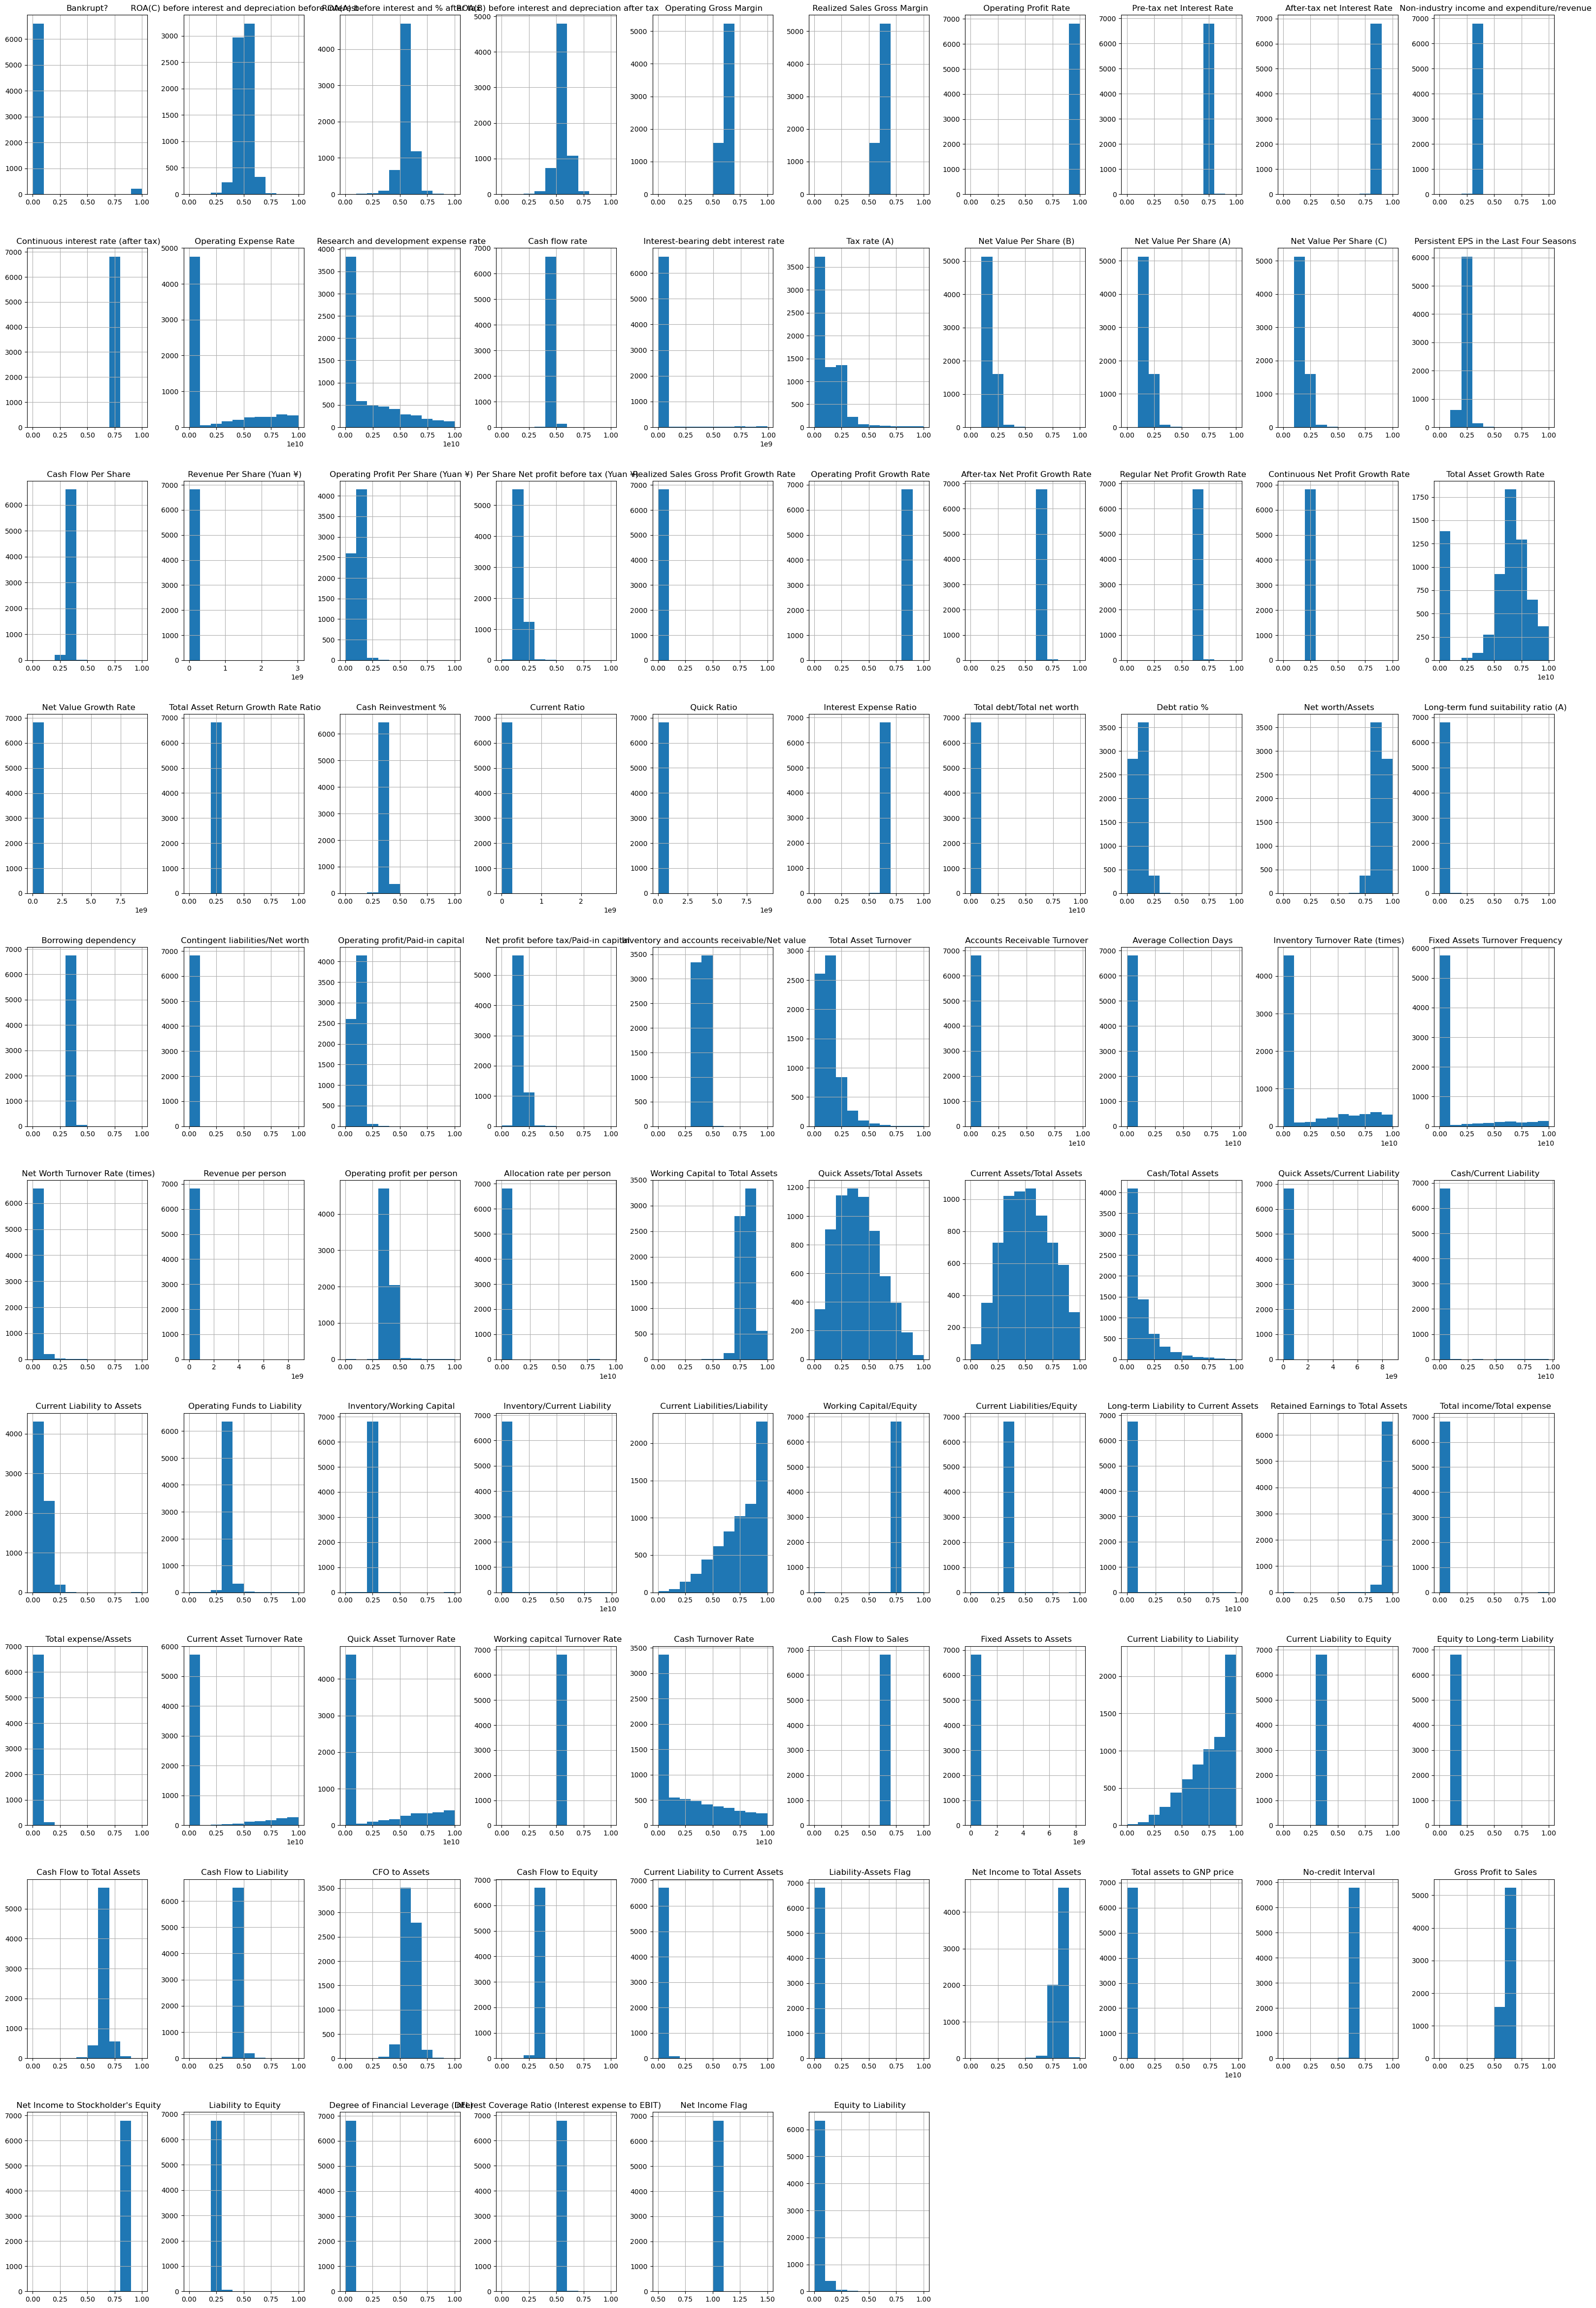

In [5]:
df.hist(figsize = (40,60))
plt.show()

In [6]:
# Separando entre obzervação e preditores

Y = df['Bankrupt?']
X = df[df.columns.tolist()[1:]]

# 3. Pegando os Componentes Principais

In [7]:
# Pegando os componentes principais 

from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler

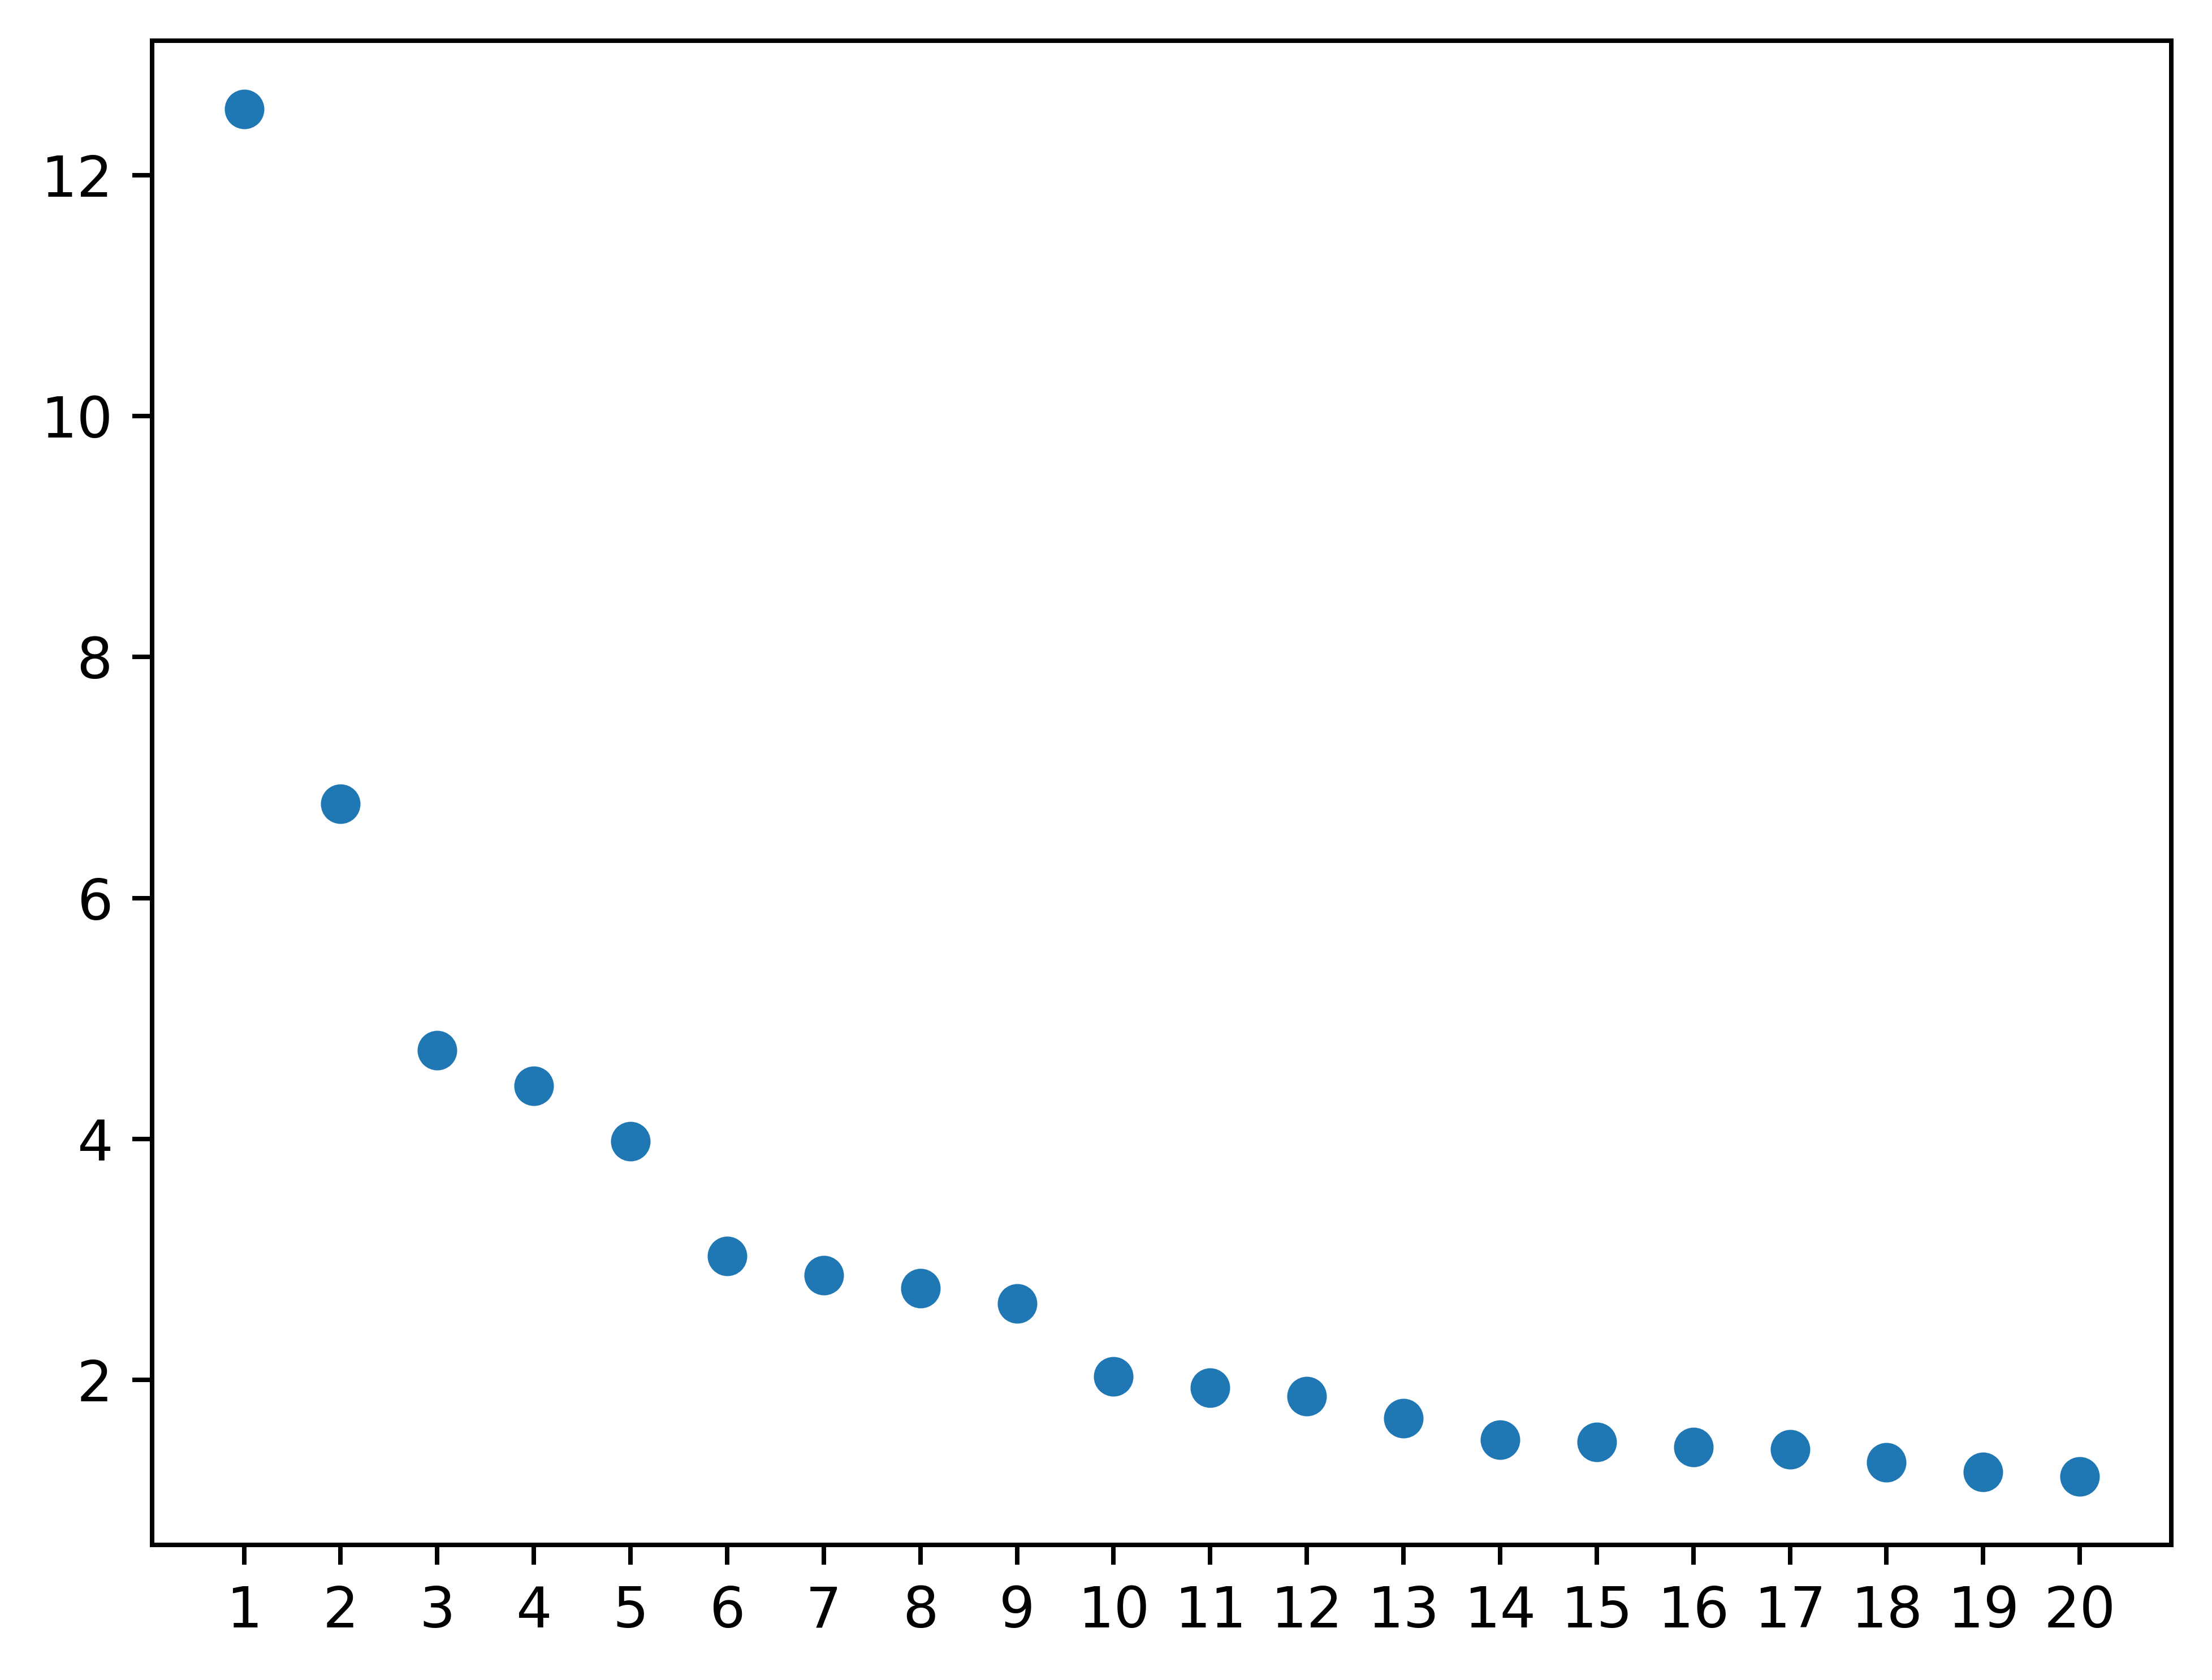

A partir do sexto componente principal a queda na variância já é extremamente marginal


In [8]:
# normalizando os dados para pegar os PCAs

scaler = StandardScaler()

X_normal = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

# pegando a variância explicada pelos componentes principais

pca = PCA(n_components = 20)

evs = pca.fit(X_normal).explained_variance_

fig, ax = plt.subplots(dpi = 720)

ax.scatter(range(1,21), evs)
ax.set_xticks(range(1,21))
ax.set_xticklabels(range(1,21))

plt.show()

print('A partir do sexto componente principal a queda na variância já é extremamente marginal')

In [9]:
# pegando até o sexto componente 

scaler = StandardScaler()

X_normal = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

pca = PCA(n_components = 6)

X_pca = pd.DataFrame(pca.fit_transform(X_normal), columns = ['pca_1','pca_2','pca_3',
                                                             'pca_4','pca_5','pca_6'])

X_pca

,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6
0,-7.338294,0.373294,-0.309014,-1.021642,0.162798,1.448300
1,-2.703713,-0.986346,-2.155617,-2.473644,0.835692,0.607047
2,-4.307059,-0.404700,-0.309801,-0.729865,0.335723,-0.198898
3,-5.830736,-1.385669,-1.301105,-2.160071,0.731532,1.043664
4,-2.343197,-0.201748,0.806267,-0.894912,0.203652,0.266931
...,...,...,...,...,...,...
6814,-1.177758,-0.508512,0.189843,0.236673,0.063634,-0.119839
6815,-1.282275,-0.663230,0.247693,-0.445795,0.231082,-0.793491
6816,1.910308,-1.693786,-1.409778,0.955907,-0.078499,-2.136376
6817,1.854261,-0.397923,-0.488640,0.720515,-0.043994,0.648606


# 4. Treinando os Algoritmos

In [10]:
# criando um dataframe para salvar os resultados das avaliações

resultados = pd.DataFrame({'Algoritmo': ['Logística',
                                         'KNN',
                                         'Naive Bayes',
                                         'Árvores',
                                         'Bagging',
                                         'Random Forest',
                                         'Boosting',
                                         'Support Vector Machines',
                                         'LDA',
                                         'QDA'],
                           'Accuracy':np.zeros(10),
                           'AUC':np.zeros(10),
                           'True Positive':np.zeros(10)})

## 4.1 Regressão Logística

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
# dividindo entre conjunto de treinamento e conjunto de teste

X_train, X_test, Y_train, Y_test = train_test_split(X_pca, Y, test_size = 0.25, random_state = 0)

# fit para o modelo com diferentes penalizações

model_none = LogisticRegression(penalty = None, max_iter = 7000).fit(X_train, Y_train)
model_l1   = LogisticRegression(penalty = 'l1', max_iter = 7000, solver = 'saga', C = 0.1).fit(X_train, Y_train)
model_l2   = LogisticRegression(penalty = 'l2', max_iter = 7000, C = 0.1).fit(X_train, Y_train)

# olhando accuracia no conjunto de teste

Y_pred_none = model_none.predict(X_test)
Y_pred_l1   = model_l1.predict(X_test)
Y_pred_l2   = model_l2.predict(X_test)


print('A Acurácia não muda com a especificação da penalização, mesmo com um parâmetro bem baixo')
print(f'none:  {accuracy_score(Y_test, Y_pred_none):.4f}')
print(f'l1:    {accuracy_score(Y_test, Y_pred_l1):.4f}')
print(f'l2:    {accuracy_score(Y_test, Y_pred_l2):.4f}')

A Acurácia não muda com a especificação da penalização, mesmo com um parâmetro bem baixo
none:  0.9683
l1:    0.9672
l2:    0.9683


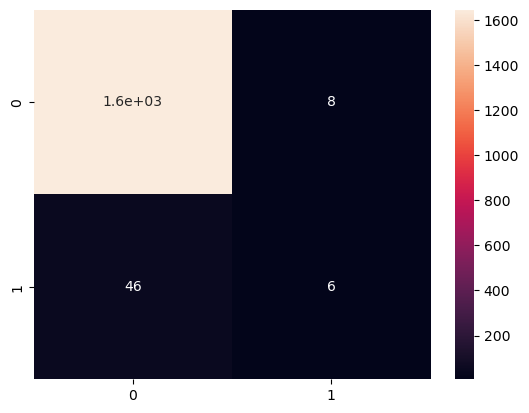

In [13]:
# mostrando a matriz de confusão

from sklearn.metrics import confusion_matrix

cm_none = confusion_matrix(Y_test, Y_pred_none)
cm_l1   = confusion_matrix(Y_test, Y_pred_l1)
cm_l2   = confusion_matrix(Y_test, Y_pred_l2)

sns.heatmap(cm_none, annot = True)

plt.show()

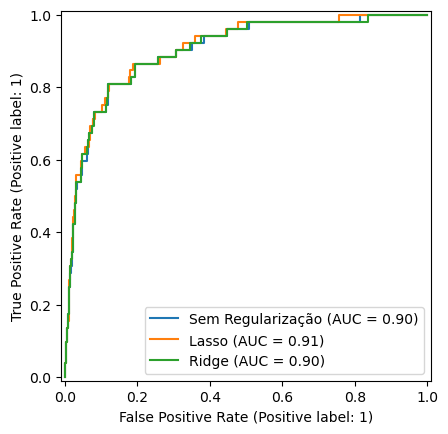

In [14]:
fig, ax = plt.subplots()

RocCurveDisplay.from_estimator(model_none, X_test, Y_test, ax = ax, name = 'Sem Regularização')
RocCurveDisplay.from_estimator(model_l1,   X_test, Y_test, ax = ax, name = 'Lasso')
RocCurveDisplay.from_estimator(model_l2,   X_test, Y_test, ax = ax, name = 'Ridge')

plt.show()

In [15]:
# salvando os resultados 

acc = round(accuracy_score(Y_test, model_none.predict(X_test)),3)

auc = round(roc_auc_score(Y_test, model_none.predict_proba(X_test)[:,1]),3)

tn, fp, fn, tp = cm_none.ravel()
tpr = tp/(tp+fn)

resultados.loc[resultados['Algoritmo'] == 'Logística','Accuracy'] = acc
resultados.loc[resultados['Algoritmo'] == 'Logística','AUC'] = auc
resultados.loc[resultados['Algoritmo'] == 'Logística','True Positive'] = round(tpr,3)

## 4.2 K-Nearest Neighbors

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [17]:
# dividindo em grupo de teste e grupo de treinamento 

X_train, X_test, Y_train, Y_test = train_test_split(X_pca, Y, test_size = 0.25, random_state = 42)

# estimando 

knn = KNeighborsClassifier(n_neighbors = 20).fit(X_train, Y_train)

Y_pred = knn.predict(X_test)

print(f'Acurácia:{accuracy_score(Y_test,Y_pred):.2f}')

Acurácia:0.97


<Axes: >

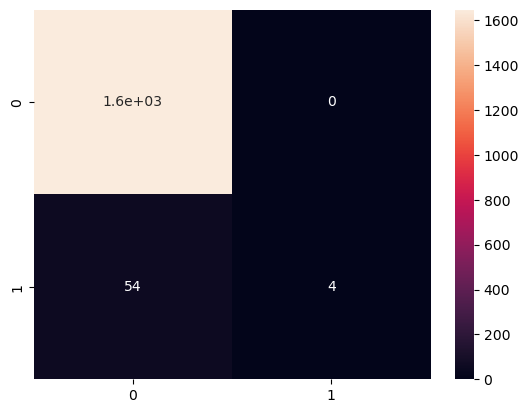

In [18]:
# matriz de confusão 

cm_knn = confusion_matrix(Y_test, Y_pred)

sns.heatmap(cm_knn, annot = True)

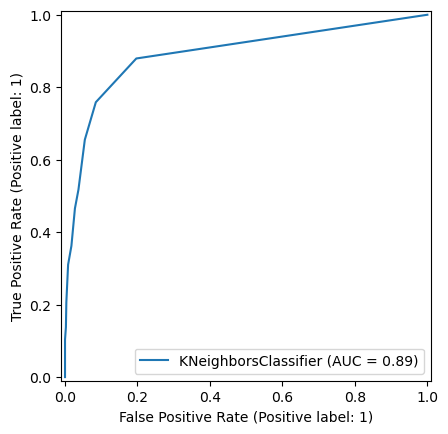

In [19]:
RocCurveDisplay.from_estimator(knn, X_test, Y_test)

In [20]:
acc = round(accuracy_score(Y_test, knn.predict(X_test)),3)

auc = round(roc_auc_score(Y_test, knn.predict_proba(X_test)[:,1]),3)

tn, fp, fn, tp = cm_knn.ravel()
tpr = tp/(tp+fn)


resultados.loc[resultados['Algoritmo'] == 'KNN','Accuracy'] = acc
resultados.loc[resultados['Algoritmo'] == 'KNN','AUC'] = auc
resultados.loc[resultados['Algoritmo'] == 'KNN','True Positive'] = round(tpr,3)

## 4.3 Naive Bayes

In [21]:
from sklearn.naive_bayes import GaussianNB

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X_pca, Y, test_size = 0.25, random_state = 0)

model = GaussianNB()

model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

print(f'Acurácia: {accuracy_score(Y_test, Y_pred):.2f}')

Acurácia: 0.95


<Axes: >

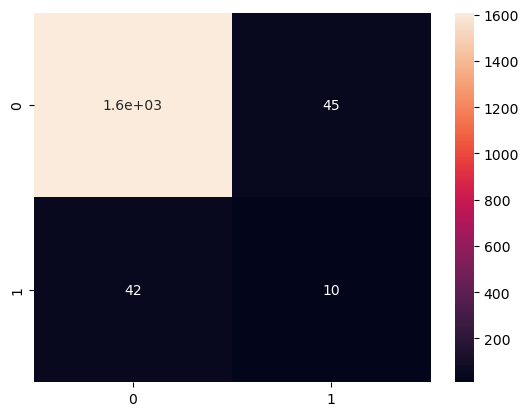

In [23]:
# pelo naive bayes 

cm = confusion_matrix(Y_test, Y_pred)

sns.heatmap(cm, annot = True)

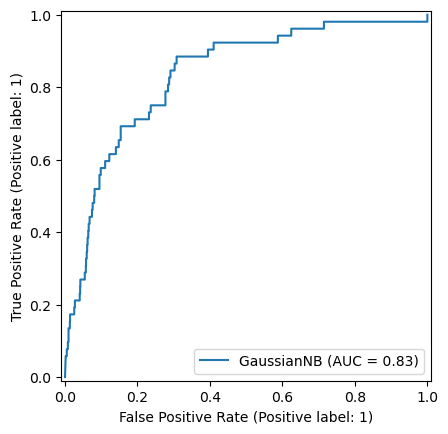

In [24]:
RocCurveDisplay.from_estimator(model, X_test, Y_test)

In [25]:
acc = round(accuracy_score(Y_test, model.predict(X_test)),3)

auc = round(roc_auc_score(Y_test, model.predict_proba(X_test)[:,1]),3)

tn, fp, fn, tp = cm.ravel()
tpr = tp/(tp+fn)

resultados.loc[resultados['Algoritmo'] == 'Naive Bayes','Accuracy'] = acc
resultados.loc[resultados['Algoritmo'] == 'Naive Bayes','AUC'] = auc
resultados.loc[resultados['Algoritmo'] == 'Naive Bayes','True Positive'] = round(tpr,3)

## 4.4 Árvores de Decisão

In [26]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X_pca,Y, test_size = 0.25, random_state = 0)

model_entropy = DecisionTreeClassifier(criterion = 'entropy',
                                       random_state = 0,
                                       max_depth = 15)

model_gini    = DecisionTreeClassifier(criterion = 'gini',
                                       random_state = 0,
                                       max_depth = 15)

model_log_loss= DecisionTreeClassifier(criterion = 'log_loss',
                                       random_state = 0,
                                       max_depth = 15)

model_entropy.fit(X_train, Y_train)
model_gini.fit(X_train, Y_train)
model_log_loss.fit(X_train, Y_train)

print('O desempenho de uma árvore de decisão simples é bem próximo da regressão logística')
print(f'Entropia: {accuracy_score(Y_test, model_entropy.predict(X_test)):.2f}')
print(f'Gini: {accuracy_score(Y_test, model_gini.predict(X_test)):.2f}')
print(f'Log Loss: {accuracy_score(Y_test, model_log_loss.predict(X_test)):.2f}')

O desempenho de uma árvore de decisão simples é bem próximo da regressão logística
Entropia: 0.96
Gini: 0.95
Log Loss: 0.96


<Axes: >

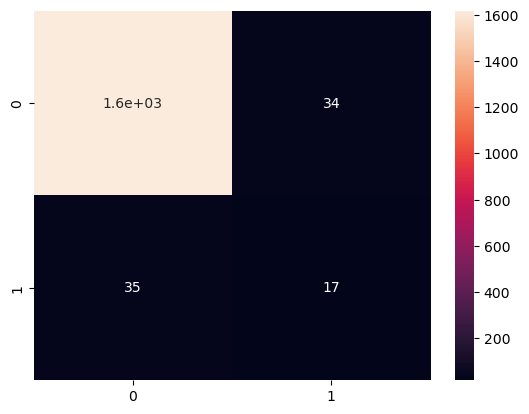

In [28]:
Y_pred = model_entropy.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)

sns.heatmap(cm, annot = True)

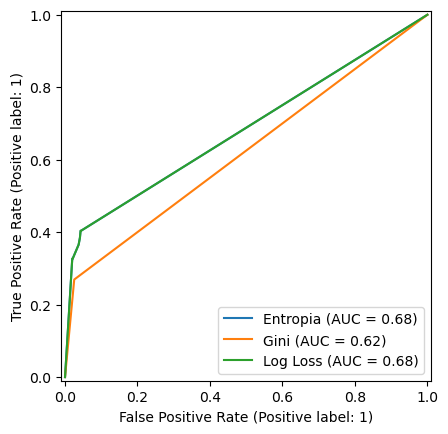

In [29]:
fig, ax = plt.subplots()

RocCurveDisplay.from_estimator(model_entropy, X_test, Y_test, ax = ax, name = 'Entropia')
RocCurveDisplay.from_estimator(model_gini, X_test, Y_test, ax = ax, name = 'Gini')
RocCurveDisplay.from_estimator(model_log_loss, X_test, Y_test, ax = ax, name = 'Log Loss')

In [30]:
acc = round(accuracy_score(Y_test, model_entropy.predict(X_test)),3)

auc = round(roc_auc_score(Y_test, model_entropy.predict_proba(X_test)[:,1]),3)

tn, fp, fn, tp = cm.ravel()
tpr = tp/(tp+fn)

resultados.loc[resultados['Algoritmo'] == 'Árvores','Accuracy'] = acc
resultados.loc[resultados['Algoritmo'] == 'Árvores','AUC'] = auc
resultados.loc[resultados['Algoritmo'] == 'Árvores','True Positive'] = round(tpr,3)

## 4.5 Bagging

In [31]:
from sklearn.ensemble import BaggingClassifier

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X_pca, Y, test_size = 0.25, random_state = 0)

model = BaggingClassifier(n_estimators = 20,
                          max_samples = 0.8)

model.fit(X_train, Y_train)

print('o bootstrap tem um desempenho marginalmente superior ao da árvore normal')
print(f'bootstrap: {accuracy_score(Y_test, model.predict(X_test)):.2f}')

o bootstrap tem um desempenho marginalmente superior ao da árvore normal
bootstrap: 0.97


<Axes: >

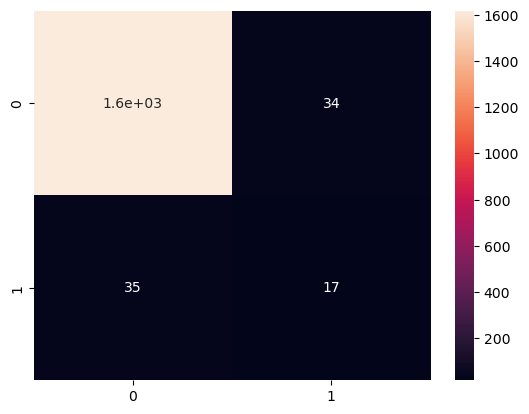

In [33]:
cm = confusion_matrix(Y_test, Y_pred)

sns.heatmap(cm, annot = True)

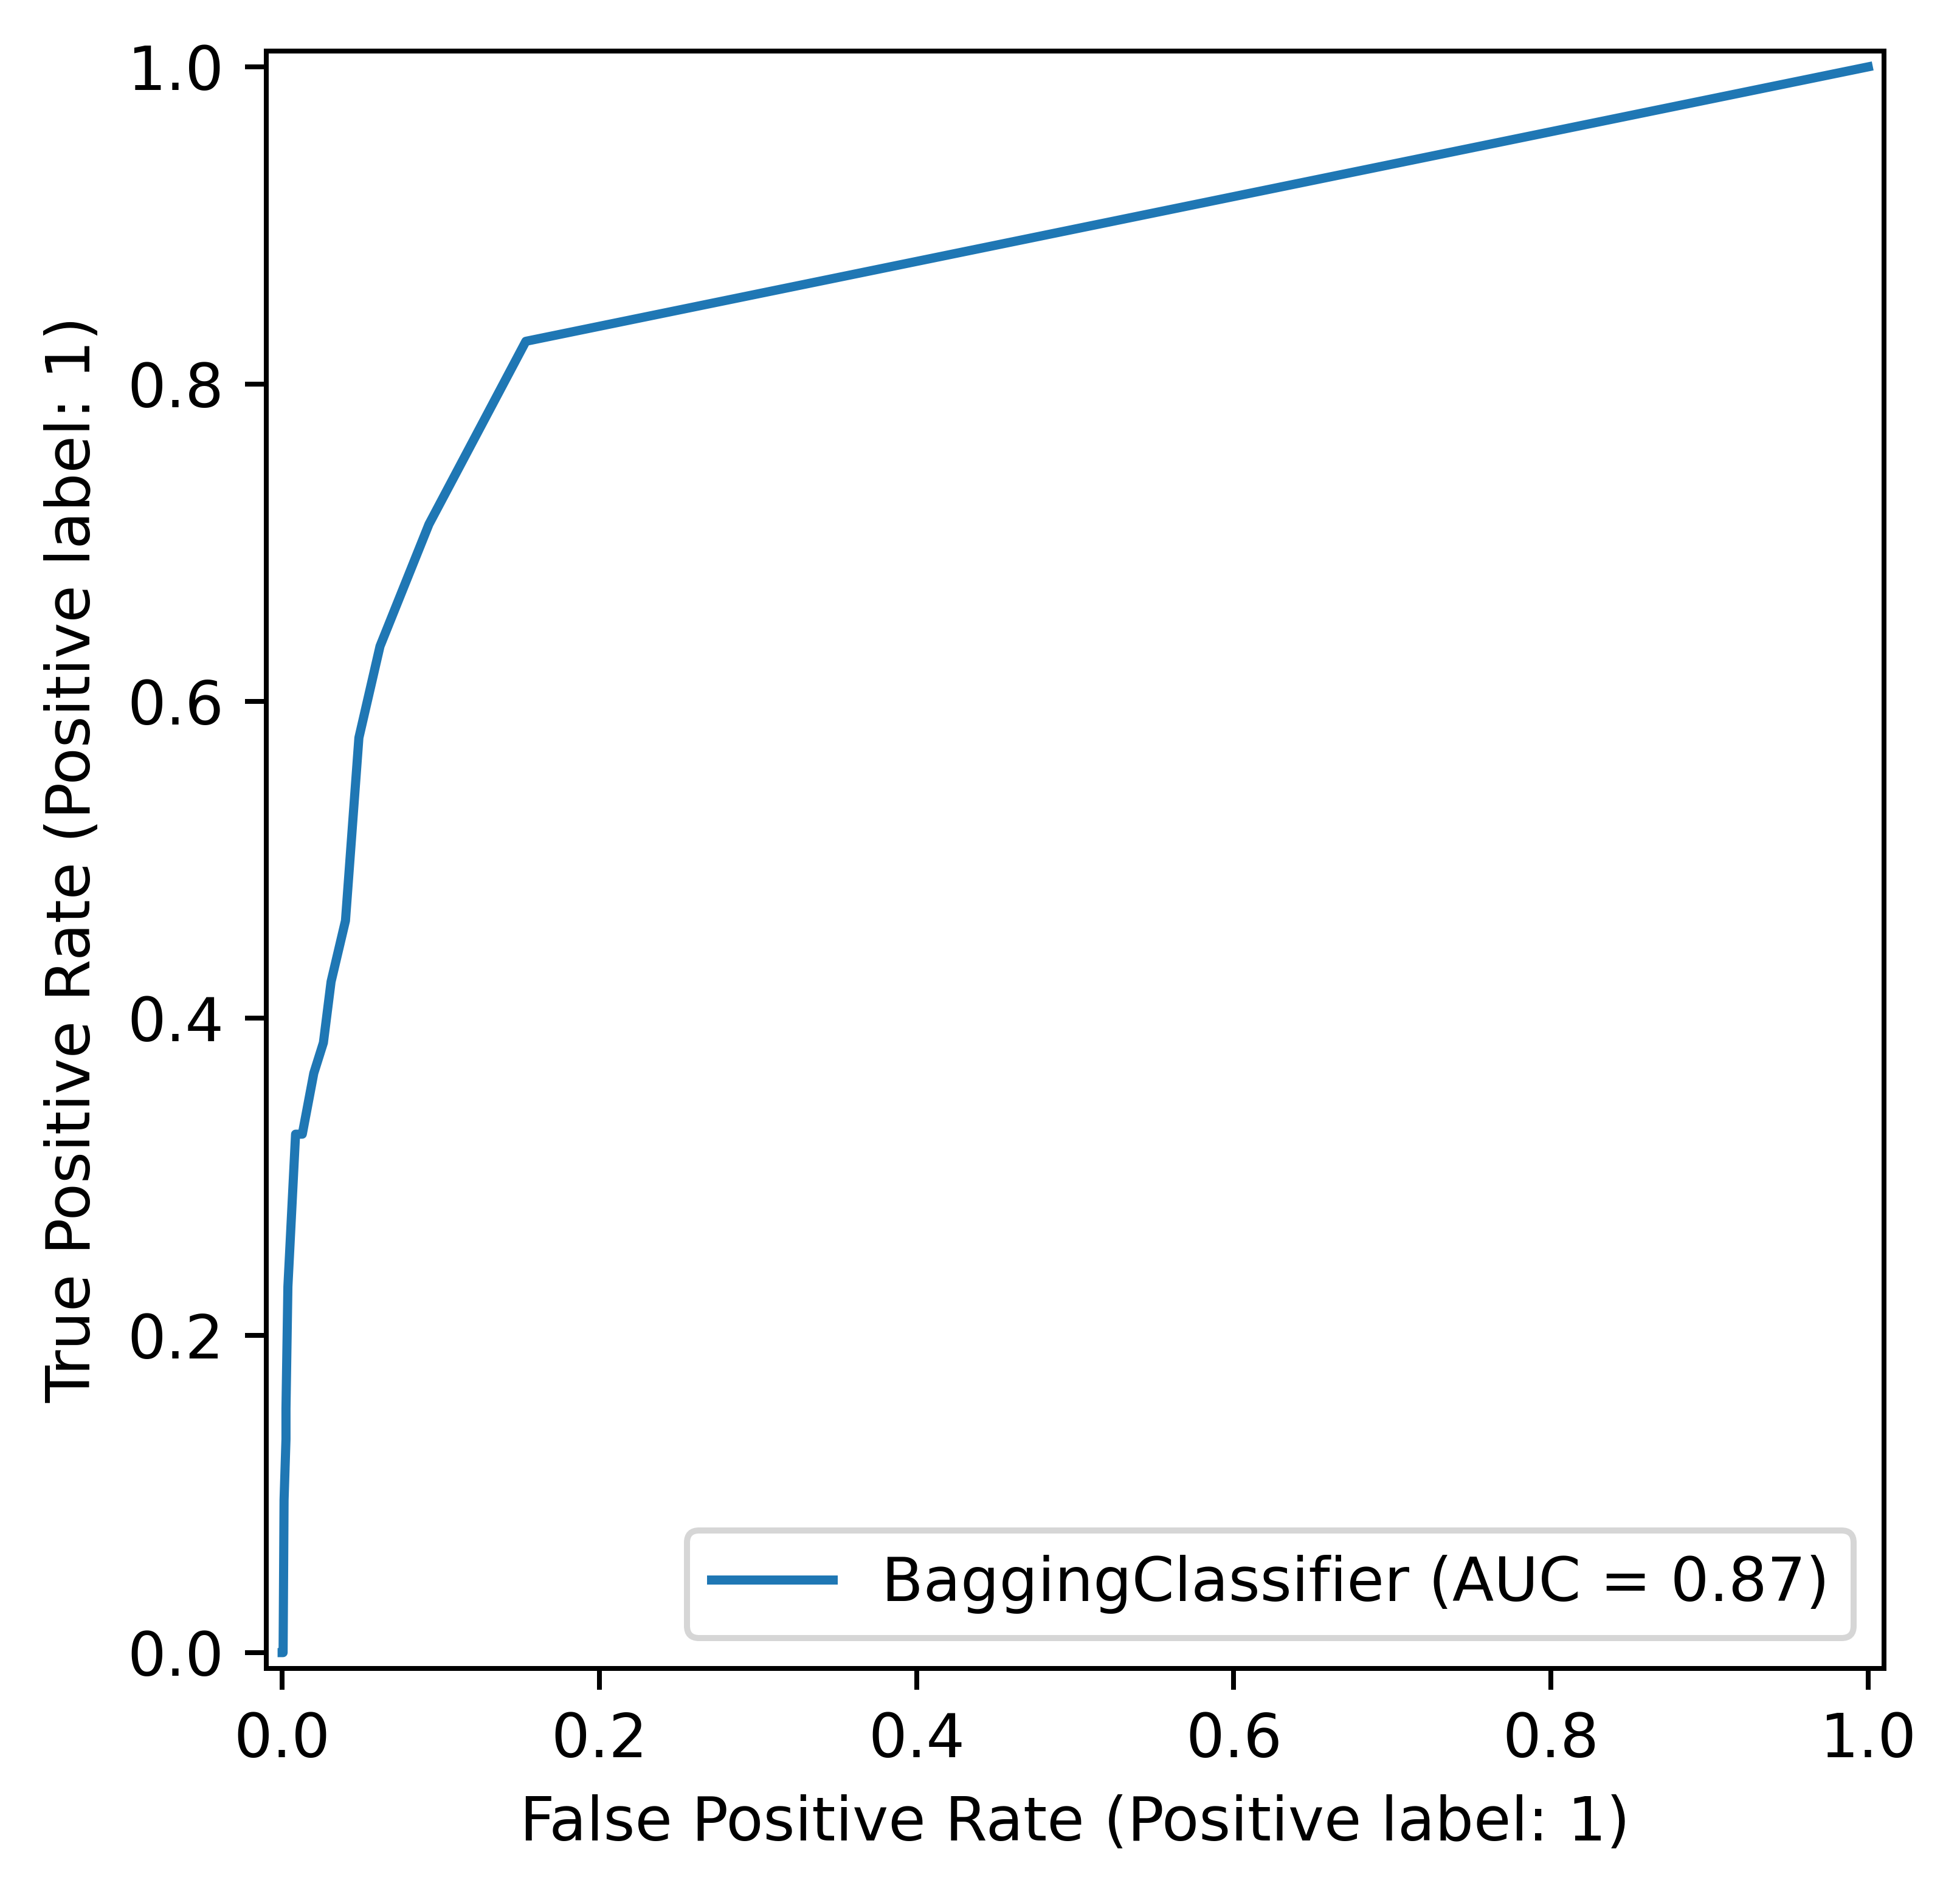

In [34]:
fig, ax = plt.subplots(dpi = 720)

RocCurveDisplay.from_estimator(model, X_test, Y_test, ax = ax)

plt.show()

In [35]:
acc = round(accuracy_score(Y_test, model.predict(X_test)),3)

auc = round(roc_auc_score(Y_test, model.predict_proba(X_test)[:,1]),3)

tn, fp, fn, tp = cm.ravel()
tpr = tp/(tp+fn)

resultados.loc[resultados['Algoritmo'] == 'Bagging','Accuracy'] = acc
resultados.loc[resultados['Algoritmo'] == 'Bagging','AUC'] = auc
resultados.loc[resultados['Algoritmo'] == 'Bagging','True Positive'] = round(tpr,3)

## 4.6 Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X_pca, Y, test_size = 0.25, random_state = 0)

model_gini     = RandomForestClassifier(criterion = 'gini')
model_entropy  = RandomForestClassifier(criterion = 'entropy')
model_log_loss = RandomForestClassifier(criterion = 'log_loss')

model_gini.fit(X_train,Y_train)
model_entropy.fit(X_train,Y_train)
model_log_loss.fit(X_train,Y_train)

print('O desempenho não muda muito variando a métrica')
print(f'Gini: {accuracy_score(Y_test, model_gini.predict(X_test)):.2f}')
print(f'Entropy: {accuracy_score(Y_test, model_entropy.predict(X_test)):.2f}')
print(f'Log Loss: {accuracy_score(Y_test, model_log_loss.predict(X_test)):.2f}')

O desempenho não muda muito variando a métrica
Gini: 0.97
Entropy: 0.97
Log Loss: 0.97


<Axes: >

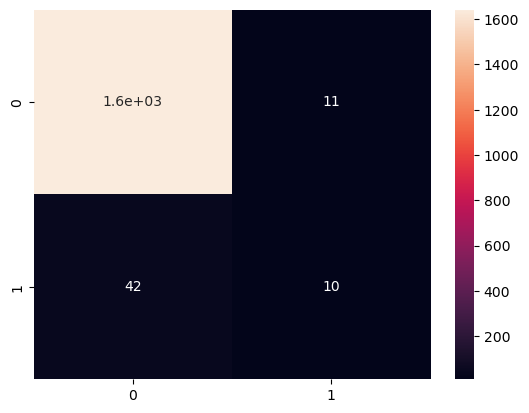

In [38]:
Y_pred = model_gini.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)

sns.heatmap(cm, annot = True)

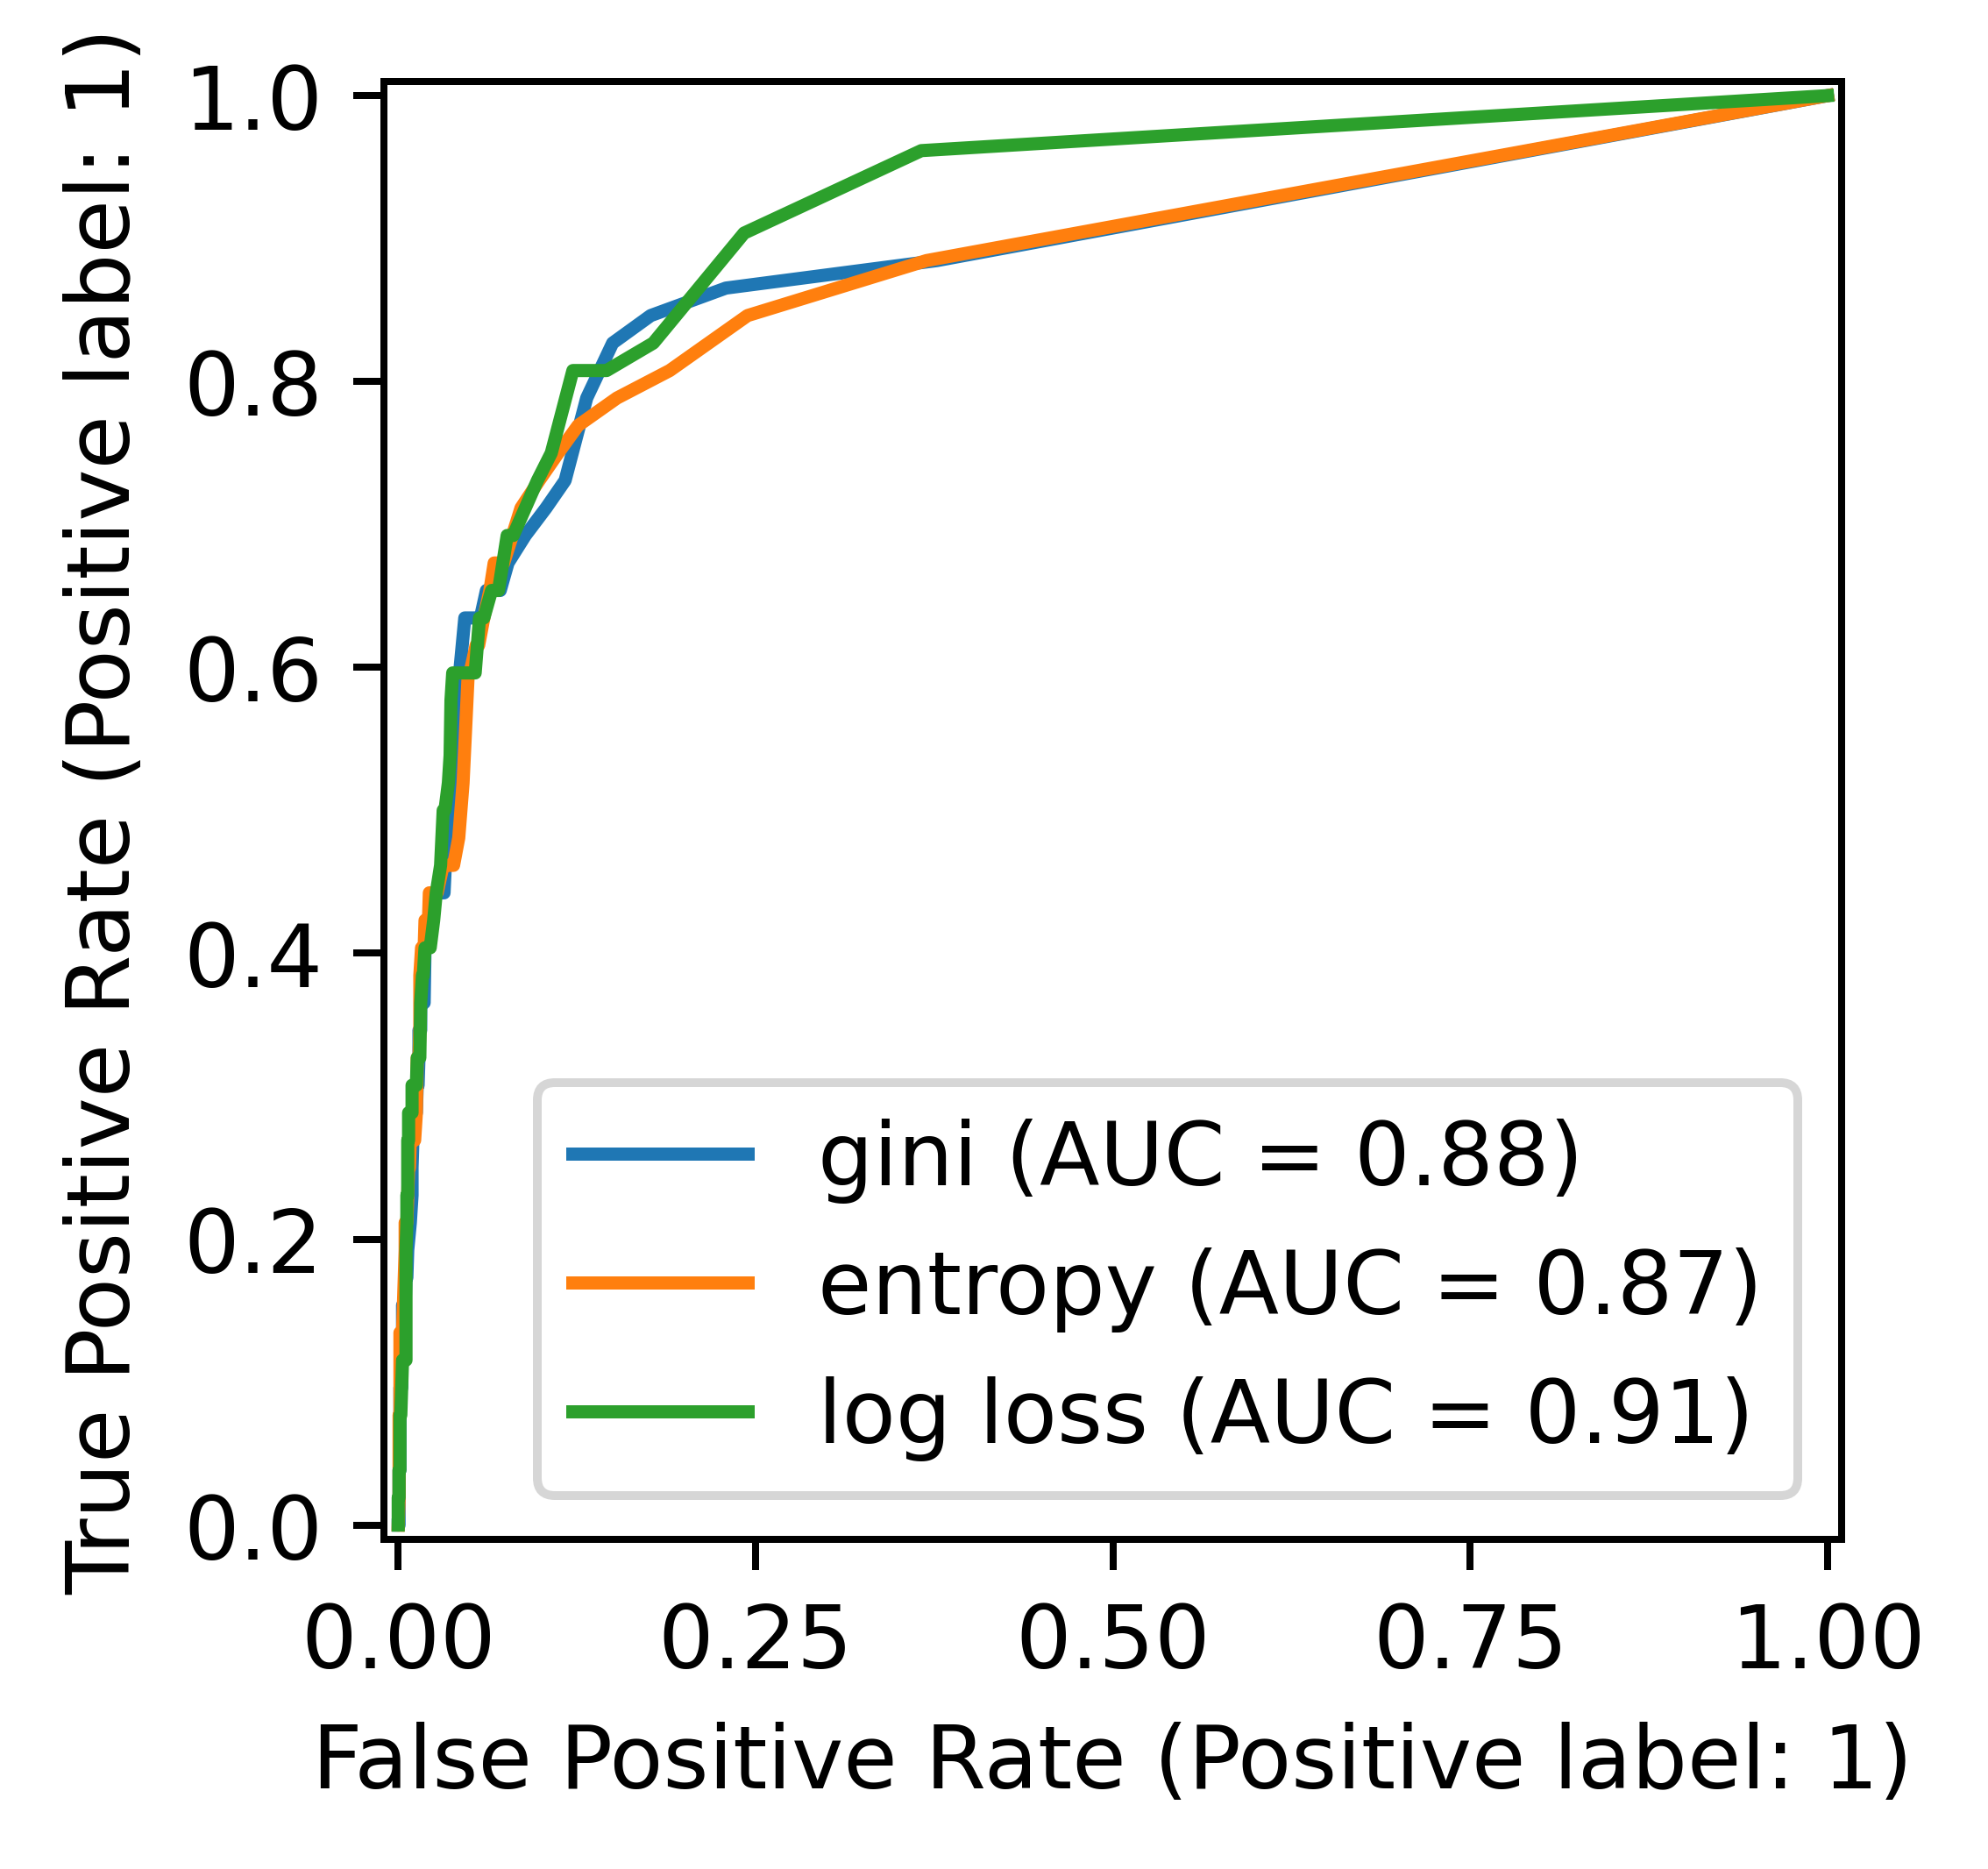

In [39]:
fig, ax = plt.subplots(dpi = 720, figsize = (3,3))

RocCurveDisplay.from_estimator(model_gini, X_test, Y_test, ax = ax, name = 'gini')
RocCurveDisplay.from_estimator(model_entropy, X_test, Y_test, ax = ax, name = 'entropy')
RocCurveDisplay.from_estimator(model_log_loss, X_test, Y_test, ax = ax, name = 'log loss')

In [40]:
acc = round(accuracy_score(Y_test, model_gini.predict(X_test)),3)

auc = round(roc_auc_score(Y_test, model_gini.predict_proba(X_test)[:,1]),3)

tn, fp, fn, tp = cm.ravel()
tpr = tp/(tp+fn)

resultados.loc[resultados['Algoritmo'] == 'Random Forest','Accuracy'] = acc
resultados.loc[resultados['Algoritmo'] == 'Random Forest','AUC'] = auc
resultados.loc[resultados['Algoritmo'] == 'Random Forest','True Positive'] = round(tpr,3)

## 4.7 Gradient Boosting

In [41]:
from sklearn.ensemble import GradientBoostingClassifier

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X_pca, Y, test_size = 0.25, random_state = 0)

model = GradientBoostingClassifier()

model.fit(X_train, Y_train)

print(f'boosting: {accuracy_score(Y_test, model.predict(X_test)):.2f}')

boosting: 0.97


<Axes: >

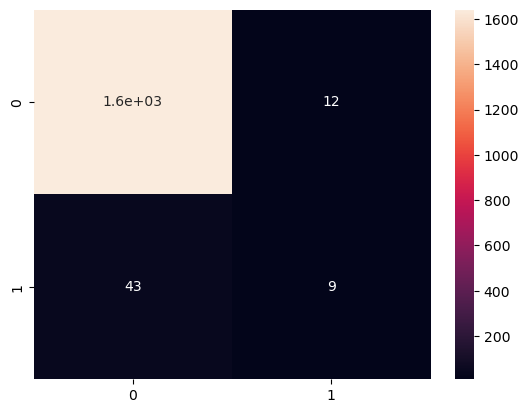

In [43]:
Y_pred = model.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)

sns.heatmap(cm, annot = True)

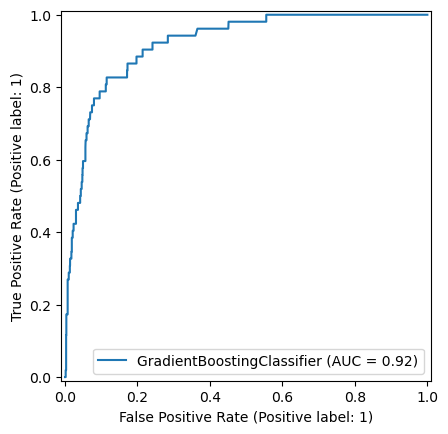

In [44]:
RocCurveDisplay.from_estimator(model, X_test, Y_test)

In [45]:
acc = round(accuracy_score(Y_test, model.predict(X_test)),3)

auc = round(roc_auc_score(Y_test, model.predict_proba(X_test)[:,1]),3)

tn, fp, fn, tp = cm.ravel()
tpr = tp/(tp+fn)

resultados.loc[resultados['Algoritmo'] == 'Boosting','Accuracy'] = acc
resultados.loc[resultados['Algoritmo'] == 'Boosting','AUC'] = auc
resultados.loc[resultados['Algoritmo'] == 'Boosting','True Positive'] = round(tpr,3)

## 4.8 Support Vector Machine

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [47]:
# separando entre conjunto de treinamento e de teste 

X_train, X_test, Y_train, Y_test = train_test_split(X_pca, Y, test_size = 0.25, random_state = 0)

# Normalizando os dados 

cols = X_train.columns

scaler = StandardScaler()

X_train_scale = scaler.fit(X_train).transform(X_train)
X_train_scale = pd.DataFrame(X_train_scale, columns = cols)

X_test_scale = scaler.fit(X_test).transform(X_test)
X_test_scale = pd.DataFrame(X_test_scale, columns = cols)

In [48]:
# Variando os kernels nos estimadores

# linear (colocar o 'linear' no parâmetro trava o python)
svc_linear  = SVC(kernel = 'poly',degree = 1).fit(X_train, Y_train) 

# polinomial
svc_poly    = SVC(kernel = 'poly'   ).fit(X_train, Y_train)

# radial
svc_rbf     = SVC(kernel = 'rbf'    ).fit(X_train, Y_train)

# sigmoid 
svc_sigmoid = SVC(kernel = 'sigmoid').fit(X_train, Y_train)



In [49]:
# olhando os resultados das previsões
# apenas o kernel sigmoide tem um desempenho marginalmente pior
# o resto dos kerneis desempenha da mesma forma

print(f'linear: {accuracy_score(Y_test, svc_linear.predict(X_test)):.2f}')
print(f'polinomial: {accuracy_score(Y_test, svc_poly.predict(X_test)):.2f}')
print(f'rbf: {accuracy_score(Y_test, svc_rbf.predict(X_test)):.2f}')
print(f'svc_sigmoid: {accuracy_score(Y_test, svc_sigmoid.predict(X_test)):.2f}')

linear: 0.97
polinomial: 0.97
rbf: 0.97
svc_sigmoid: 0.96


<Axes: >

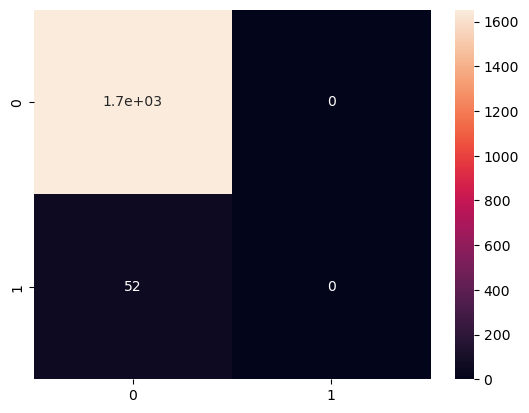

In [50]:
# esse modelo tem um problema que ele nunca prevê nenhum negativo

Y_pred = svc_linear.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)

sns.heatmap(cm, annot = True)

In [51]:
acc = round(accuracy_score(Y_test, svc_linear.predict(X_test)),3)

# auc = round(roc_auc_score(Y_test, knn.predict_proba(X_test)[:,1]),3)

tn, fp, fn, tp = cm.ravel()
tpr = tp/(tp+fn)

resultados.loc[resultados['Algoritmo'] == 'Support Vector Machines','Accuracy'] = acc
resultados.loc[resultados['Algoritmo'] == 'Support Vector Machines','AUC'] = None
resultados.loc[resultados['Algoritmo'] == 'Support Vector Machines','True Positive'] = round(tpr,3)

## 4.9 LDA

In [52]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X_pca, Y, test_size = 0.25, random_state = 0)

LDA = LinearDiscriminantAnalysis()

LDA.fit(X_train, Y_train)

print(f'LDA: {accuracy_score(Y_test, LDA.predict(X_test)):.2f}')

LDA: 0.97


<Axes: >

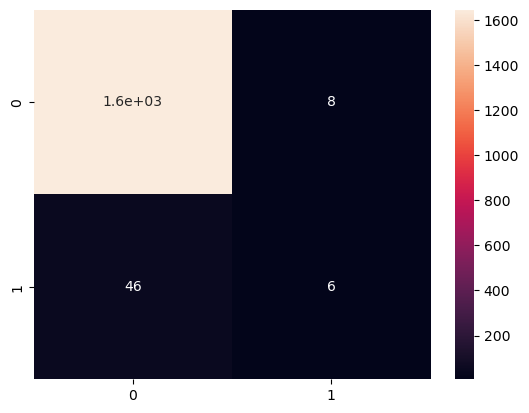

In [54]:
Y_pred = LDA.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)

sns.heatmap(cm, annot = True)

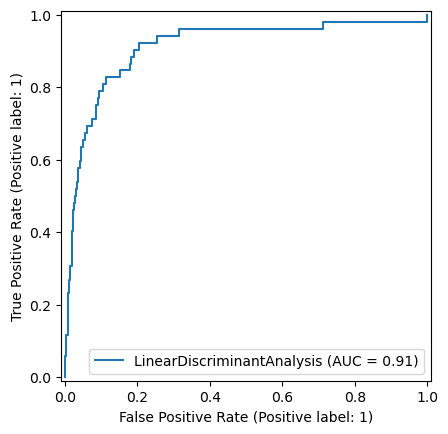

In [55]:
RocCurveDisplay.from_estimator(LDA, X_test, Y_test)

In [56]:
acc = round(accuracy_score(Y_test, LDA.predict(X_test)),3)

auc = round(roc_auc_score(Y_test, LDA.predict_proba(X_test)[:,1]),3)

tn, fp, fn, tp = cm.ravel()
tpr = tp/(tp+fn)

resultados.loc[resultados['Algoritmo'] == 'LDA','Accuracy'] = acc
resultados.loc[resultados['Algoritmo'] == 'LDA','AUC'] = auc
resultados.loc[resultados['Algoritmo'] == 'LDA','True Positive'] = round(tpr,3)

## 4.10 QDA 

In [57]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(X_pca, Y, test_size = 0.25, random_state = 0)

QDA = QuadraticDiscriminantAnalysis()

QDA.fit(X_train, Y_train)

print(f'QDA: {accuracy_score(Y_test, QDA.predict(X_test)):.2f}')

QDA: 0.96


<Axes: >

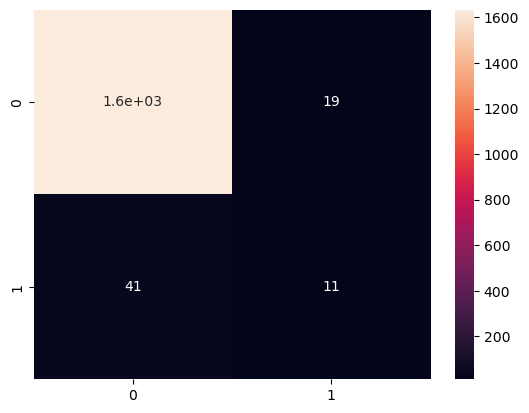

In [59]:
Y_pred = QDA.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)

sns.heatmap(cm, annot = True)

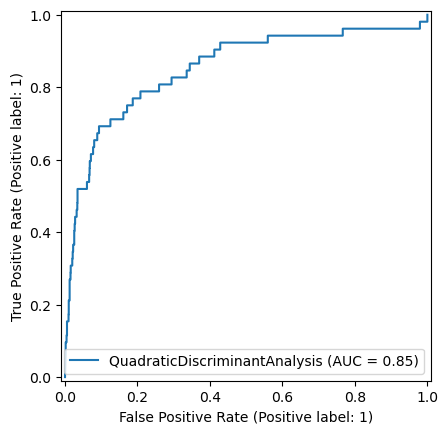

In [60]:
RocCurveDisplay.from_estimator(QDA, X_test, Y_test)

In [61]:
acc = round(accuracy_score(Y_test, QDA.predict(X_test)),3)

auc = round(roc_auc_score(Y_test, QDA.predict_proba(X_test)[:,1]),3)

tn, fp, fn, tp = cm.ravel()
tpr = tp/(tp+fn)

resultados.loc[resultados['Algoritmo'] == 'QDA','Accuracy'] = acc
resultados.loc[resultados['Algoritmo'] == 'QDA','AUC'] = auc
resultados.loc[resultados['Algoritmo'] == 'QDA','True Positive'] = round(tpr,3)

# 5. Resultados

In [62]:
resultados

,Algoritmo,Accuracy,AUC,True Positive
0,Logística,0.968,0.901,0.115
1,KNN,0.968,0.892,0.069
2,Naive Bayes,0.949,0.834,0.192
3,Árvores,0.960,0.683,0.327
4,Bagging,0.973,0.867,0.327
5,Random Forest,0.969,0.875,0.192
6,Boosting,0.968,0.921,0.173
7,Support Vector Machines,0.970,NaN,0.000
8,LDA,0.968,0.912,0.115
9,QDA,0.965,0.852,0.212
